## Indonesia GNI Forecasting using Time Series Models
- Authors: Gian Luky Saputra & Daud Muhamad A
- Date: February 2024

This notebook forecasts Indonesia’s Gross National Income (GNI) per capita using multiple time series regression models (Naive and VAR). The objective is to compare model performance and identify key macroeconomic trends.  

## Library

In [1]:
set.seed(10)

library(corrplot)
library(MASS)
library(car)
library(psych)
library(plm)
library(zoo)
library(BSDA)
library(lmtest)
library(tidyverse)
library(readxl)
library(tseries)
library(forecast)
library(patchwork)
library(astsa)
library(vars)

# install.packages("orcutt")
# library(orcutt)

op=options(repr.plot.width=10, repr.plot.height=8)

version

corrplot 0.92 loaded

Loading required package: carData


Attaching package: ‘psych’


The following object is masked from ‘package:car’:

    logit



Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric


Loading required package: lattice


Attaching package: ‘BSDA’


The following objects are masked from ‘package:carData’:

    Vocab, Wool


The following object is masked from ‘package:datasets’:

    Orange


── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   1.0.1 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.5.0 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ ggplot2::%+%()   masks psych::%+%()
✖ ggplot2::alpha() masks psych::alpha()
✖ dplyr::between() masks plm::between()
✖ dplyr::filter()  masks stats::filter()
✖ dplyr::lag()     masks plm::lag(), stats::lag()
✖ 

               _                           
platform       x86_64-pc-linux-gnu         
arch           x86_64                      
os             linux-gnu                   
system         x86_64, linux-gnu           
status                                     
major          4                           
minor          0.5                         
year           2021                        
month          03                          
day            31                          
svn rev        80133                       
language       R                           
version.string R version 4.0.5 (2021-03-31)
nickname       Shake and Throw             

### Read Data

Warning message in apply(df0, 2, as.numeric):
“NAs introduced by coercion”
Warning message in apply(df0, 2, as.numeric):
“NAs introduced by coercion”


,year,gni,gdp,unemp,inf,acc,comp,fuel,agr,nat,gdppc,ind
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,2015,3221.180,4.876322,4.51,6.363121,-2.0350419,9,67.10,33.04,1.0023699,3.555062,22.04
15,2016,3448.761,5.033069,4.30,3.525805,-1.8191509,9,71.20,31.82,0.5815219,3.758837,21.72
16,2017,3715.981,5.069786,3.78,3.808798,-1.5946569,9,75.10,30.79,0.5826711,3.841197,22.02
17,2018,3777.825,5.174292,4.39,3.198346,-2.9390729,9,78.70,29.63,1.0339046,3.987825,22.29
18,2019,4009.520,5.019288,3.59,3.030587,-2.7056620,9,81.85,28.50,0.6611586,3.872560,22.36
19,2020,3767.171,-2.065005,4.25,1.920968,-0.4187509,9,84.50,NA,0.4881931,-3.102652,NA


,year,gni,gdp,unemp,inf,acc,fuel,agr,nat,gdppc,ind
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,2015,3221.180,4.876322,4.51,6.363121,-2.0350419,67.10,33.04,1.0023699,3.555062,22.04
15,2016,3448.761,5.033069,4.30,3.525805,-1.8191509,71.20,31.82,0.5815219,3.758837,21.72
16,2017,3715.981,5.069786,3.78,3.808798,-1.5946569,75.10,30.79,0.5826711,3.841197,22.02
17,2018,3777.825,5.174292,4.39,3.198346,-2.9390729,78.70,29.63,1.0339046,3.987825,22.29
18,2019,4009.520,5.019288,3.59,3.030587,-2.7056620,81.85,28.50,0.6611586,3.872560,22.36
19,2020,3767.171,-2.065005,4.25,1.920968,-0.4187509,84.50,NA,0.4881931,-3.102652,NA


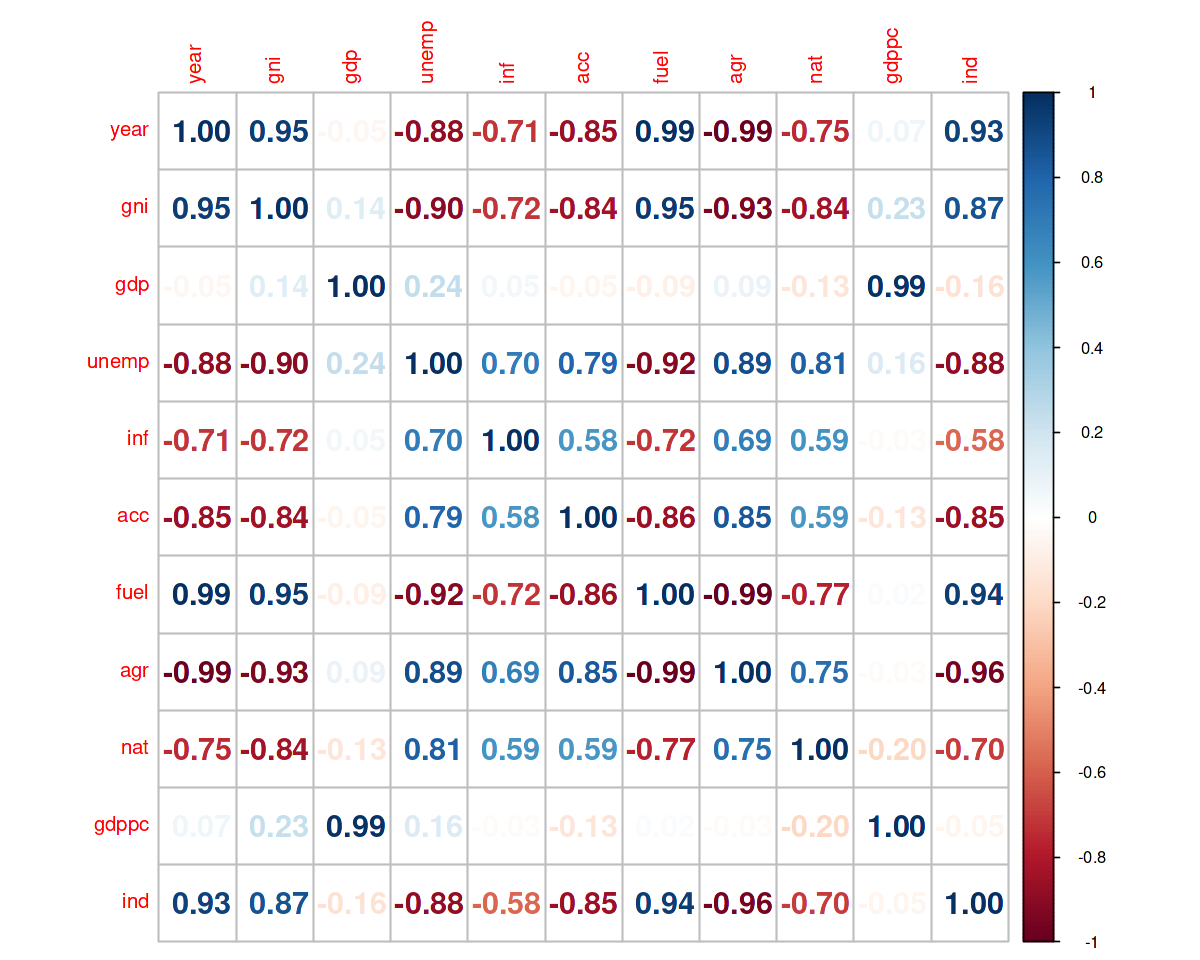


Call:
lm(formula = gni ~ . - year, data = df1)

Residuals:
    Min      1Q  Median      3Q     Max 
-433.78 -115.50  -74.38   69.03  629.06 

Coefficients:
              Estimate Std. Error t value Pr(>|t|)  
(Intercept)  4670.7993  8934.1328   0.523   0.6125  
unemp           8.1893   162.9691   0.050   0.9609  
inf             0.8962    40.8664   0.022   0.9829  
acc          -100.1706    65.0463  -1.540   0.1546  
fuel           43.0565    28.2747   1.523   0.1588  
agr            29.1660   127.6516   0.228   0.8239  
nat         -1227.2640   568.1180  -2.160   0.0561 .
ind          -197.4612   193.2509  -1.022   0.3310  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 308.8 on 10 degrees of freedom
  (1 observation deleted due to missingness)
Multiple R-squared:  0.9549,	Adjusted R-squared:  0.9234 
F-statistic: 30.27 on 7 and 10 DF,  p-value: 5.95e-06


,year,gni,unemp,inf,acc,nat,ind
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
14,2015,3221.180,4.51,6.363121,-2.0350419,1.0023699,22.04
15,2016,3448.761,4.30,3.525805,-1.8191509,0.5815219,21.72
16,2017,3715.981,3.78,3.808798,-1.5946569,0.5826711,22.02
17,2018,3777.825,4.39,3.198346,-2.9390729,1.0339046,22.29
18,2019,4009.520,3.59,3.030587,-2.7056620,0.6611586,22.36
19,2020,3767.171,4.25,1.920968,-0.4187509,0.4881931,22.36


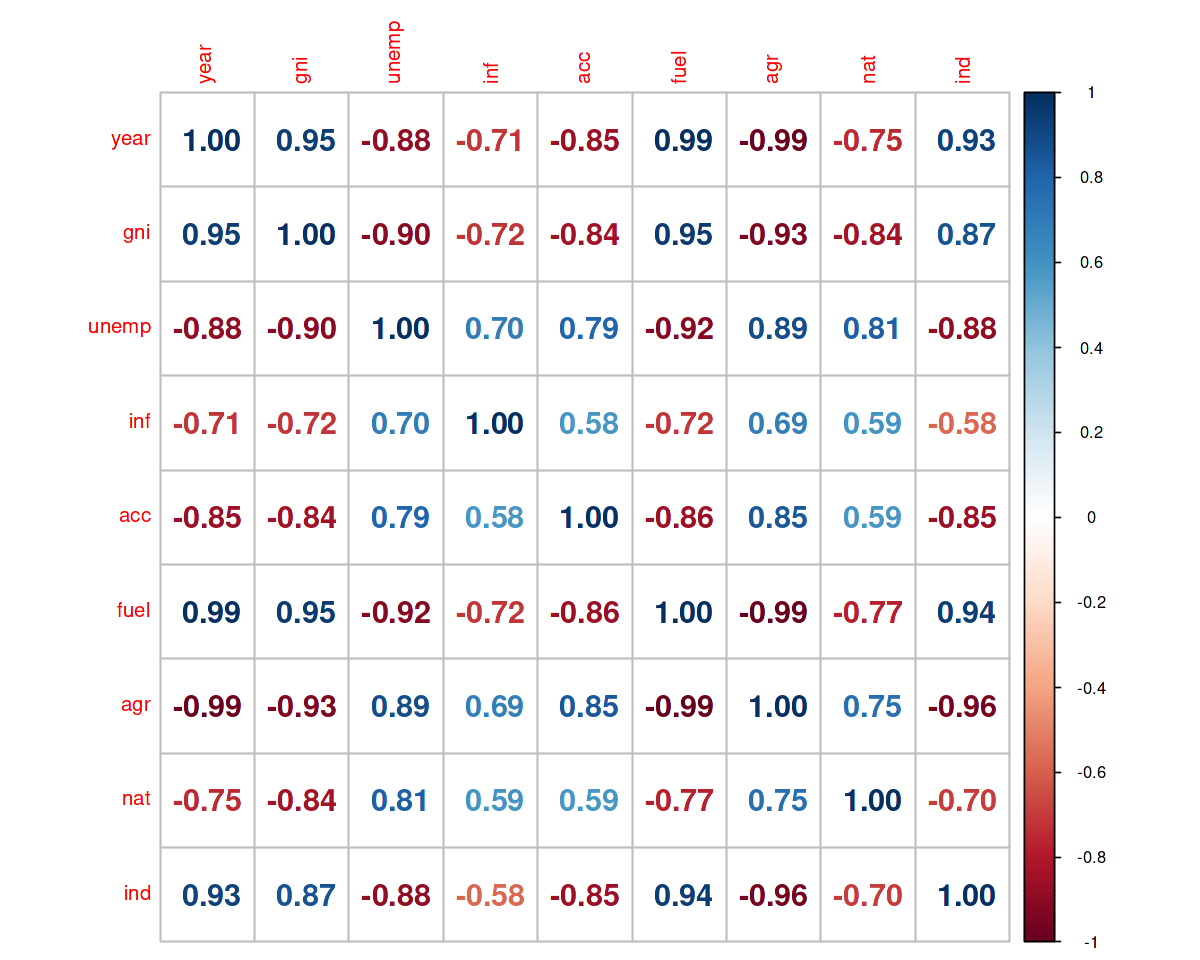

In [2]:
df0 = read_excel("/kaggle/input/data-ons24/data_semions.xlsx")
nama_kol = unlist(str_split("year gni gdp unemp inf acc comp fuel agr nat gdppc ind"," "))

names(df0) = nama_kol
df0 = as.data.frame(apply(df0, 2, as.numeric))
df1 = df0
tail(df1)

# drop comp as a constant var
df1["comp"] = NULL
tail(df1)

corrplot(cor(df1[1:18,]), method="number",number.cex=1.5)

# remove gdp gdpcc --- least relation with the gni
df1["gdp"] = NULL
df1["gdppc"] = NULL

corrplot(cor(df1[1:18,]), method="number",number.cex=1.5)

# remove fuel dan agr, why? too much relation to year? idk
lm1 = lm(gni~.-year, df1)
summary(lm1)

df1["fuel"] = NULL
df1["agr"] = NULL


# rolling imputasi
df1[19, "ind"] = df1[18, "ind"] 

tail(df1)

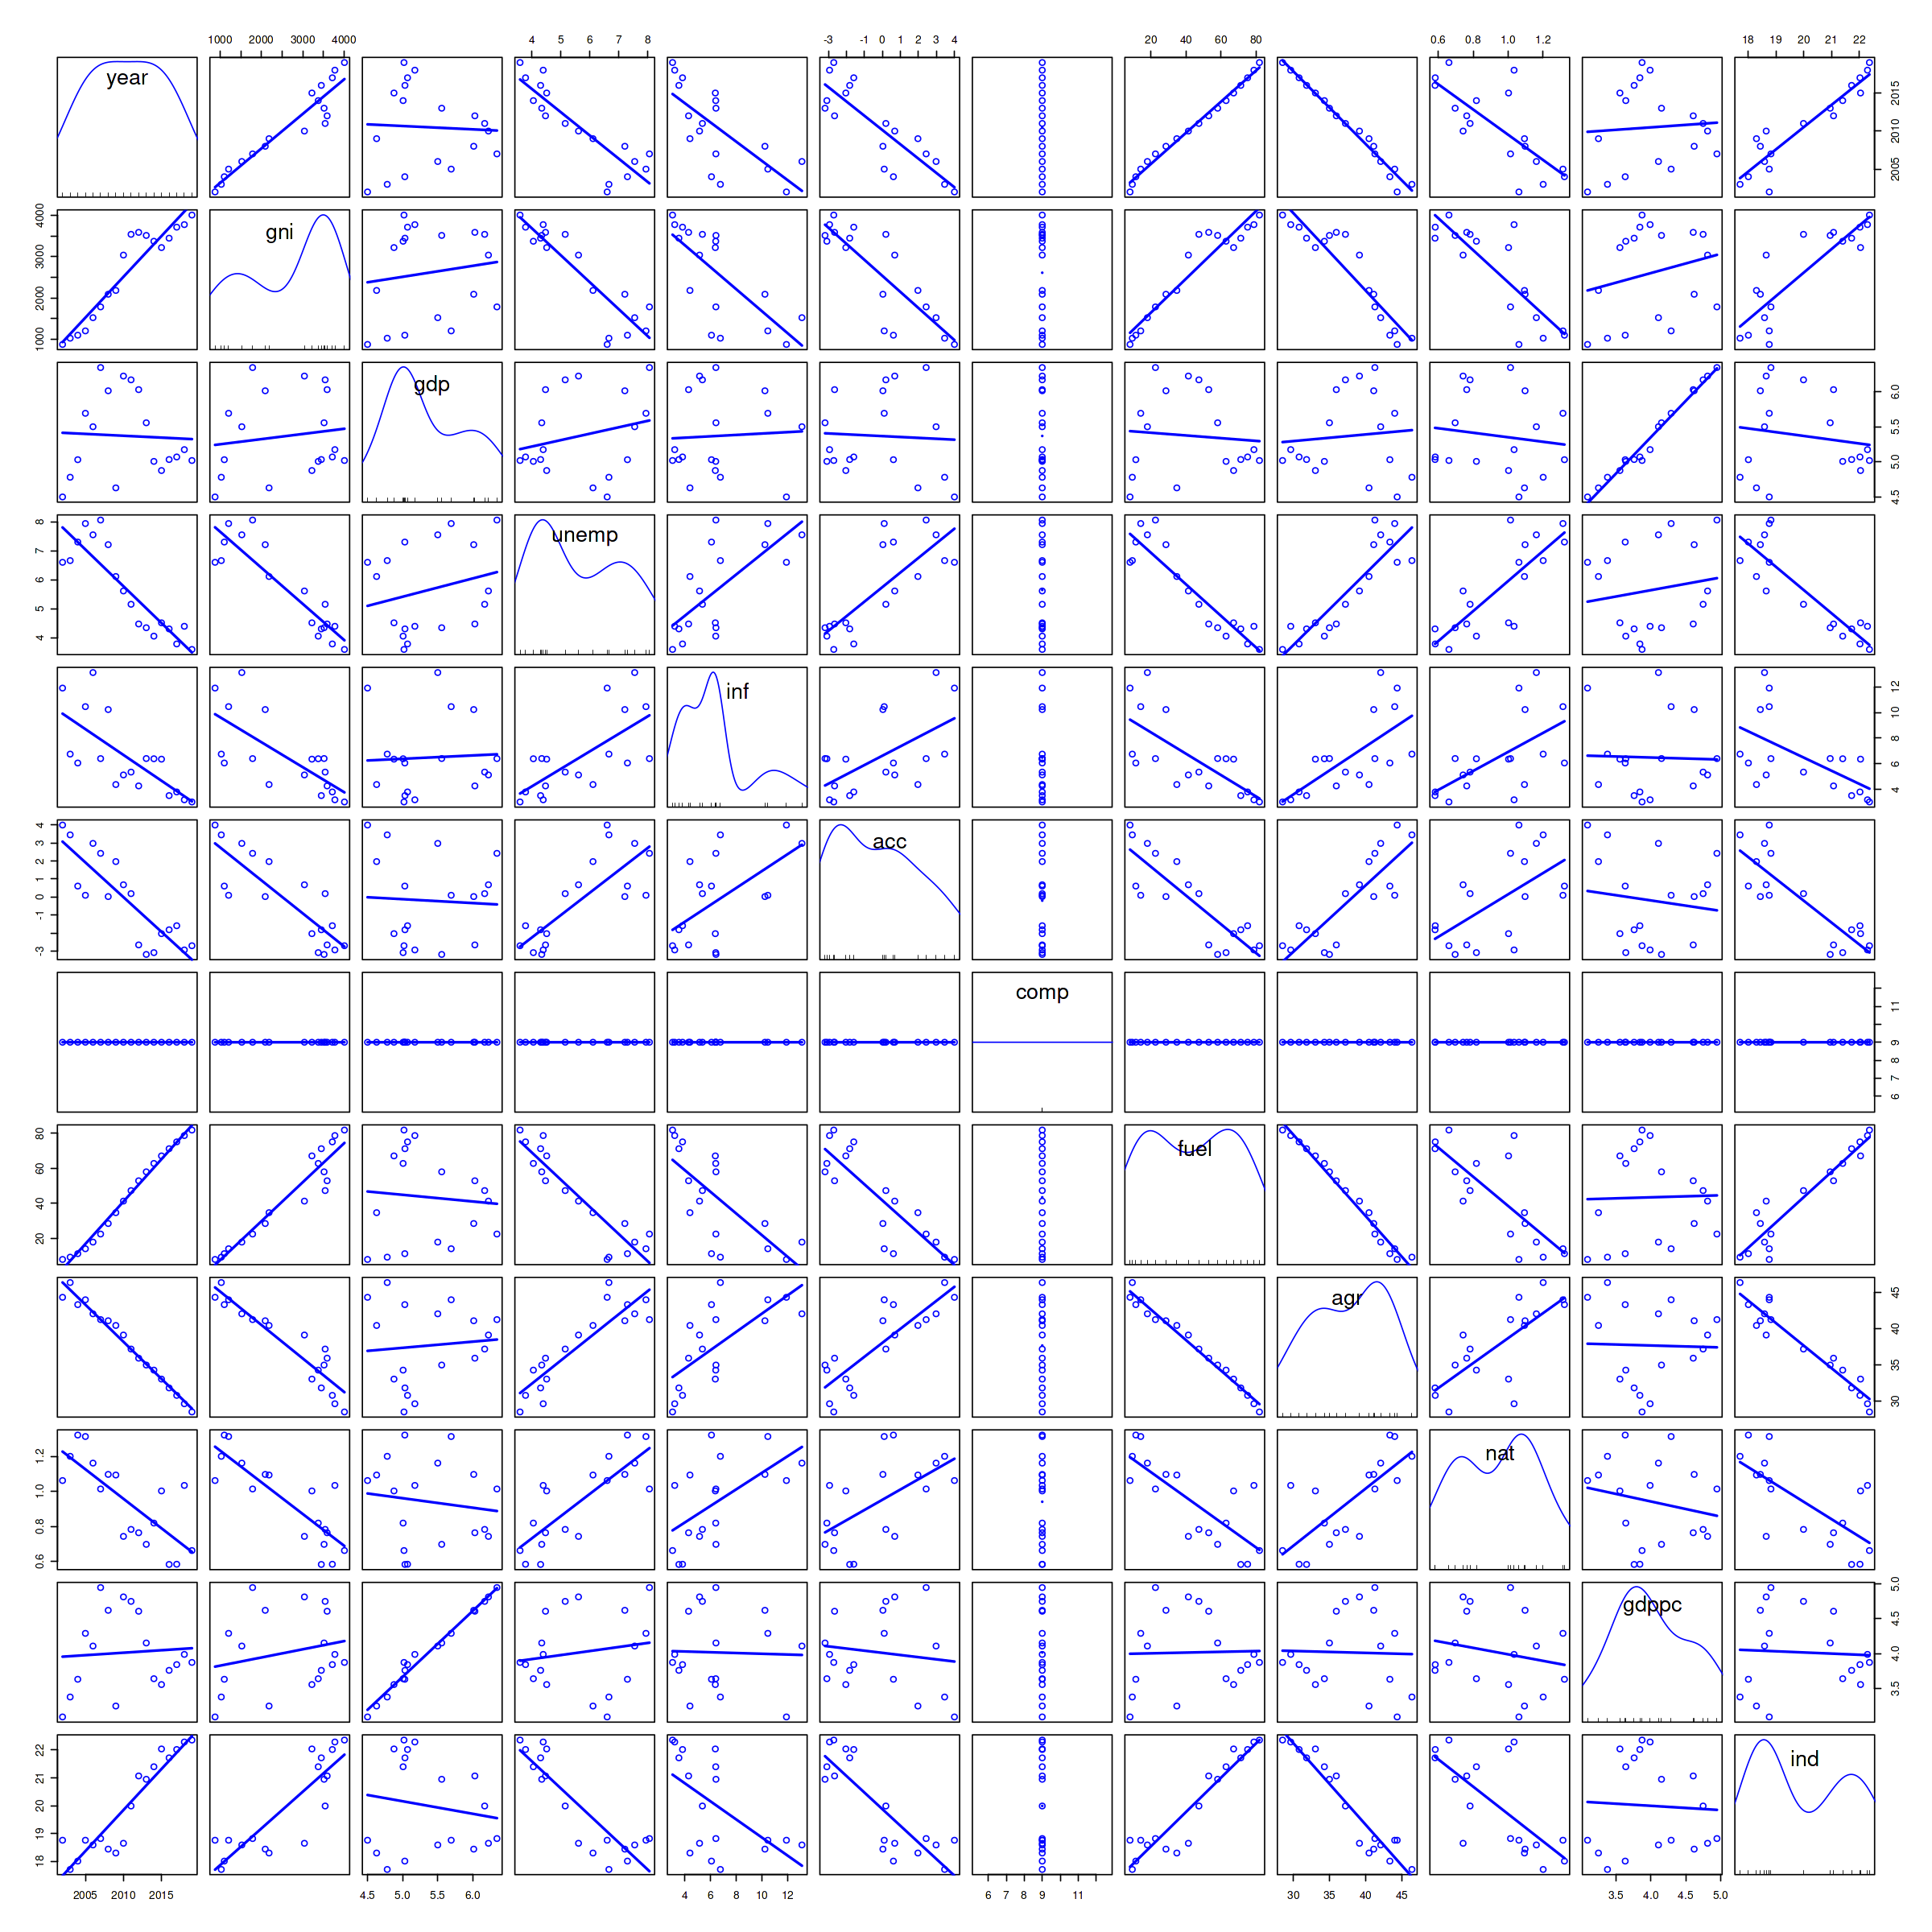

In [3]:
# just scatter plot matrix
options(repr.plot.width=20, repr.plot.height=20)
scatterplotMatrix(df0, smooth=F)

options(op)

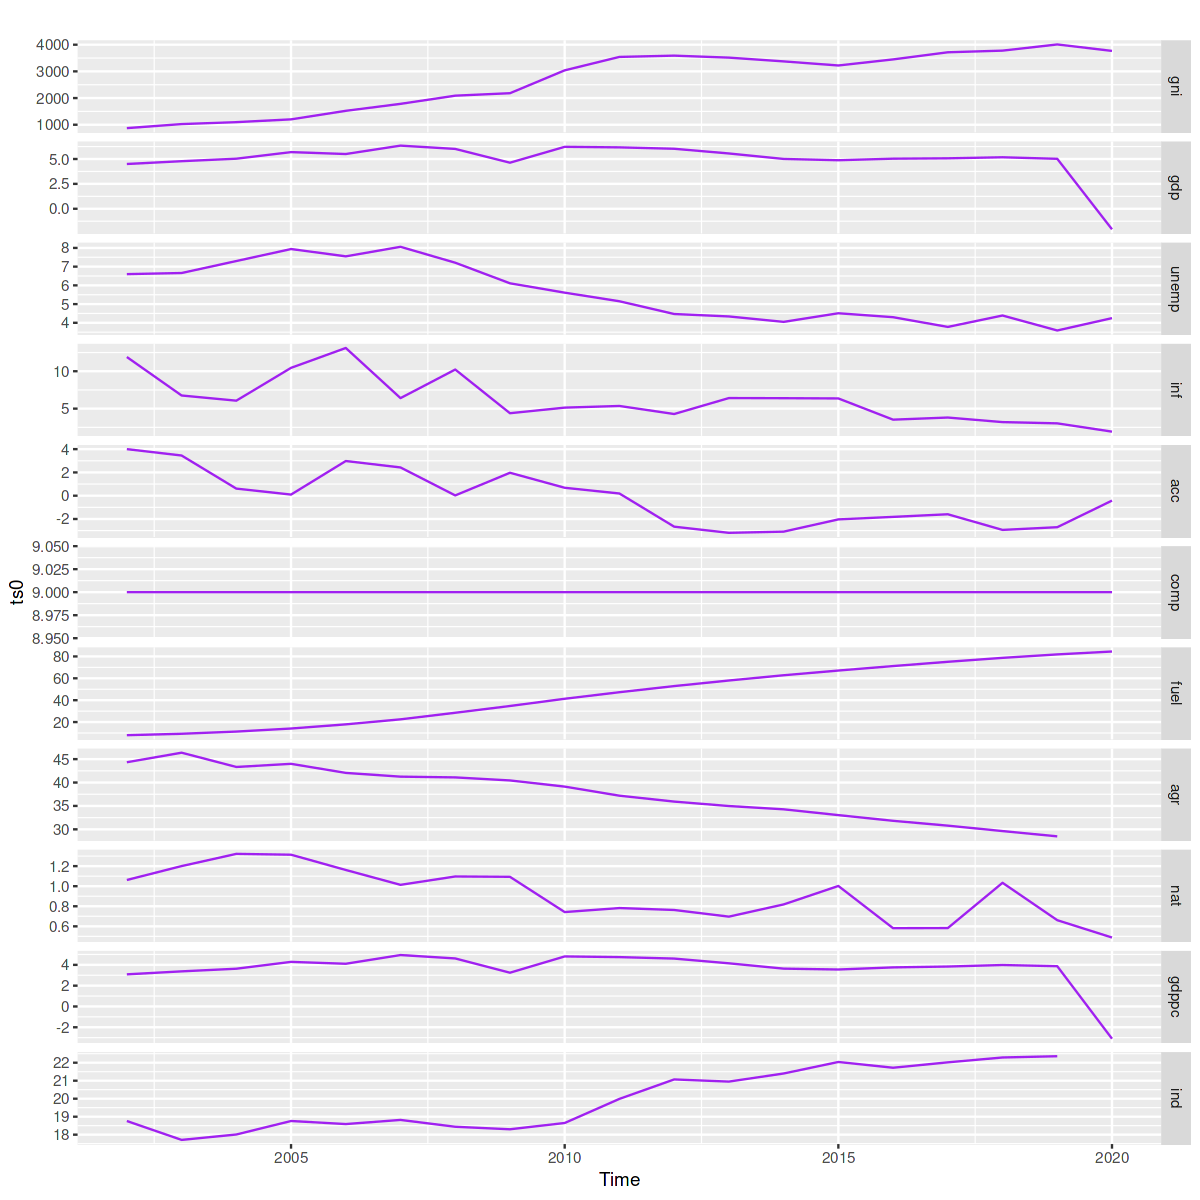

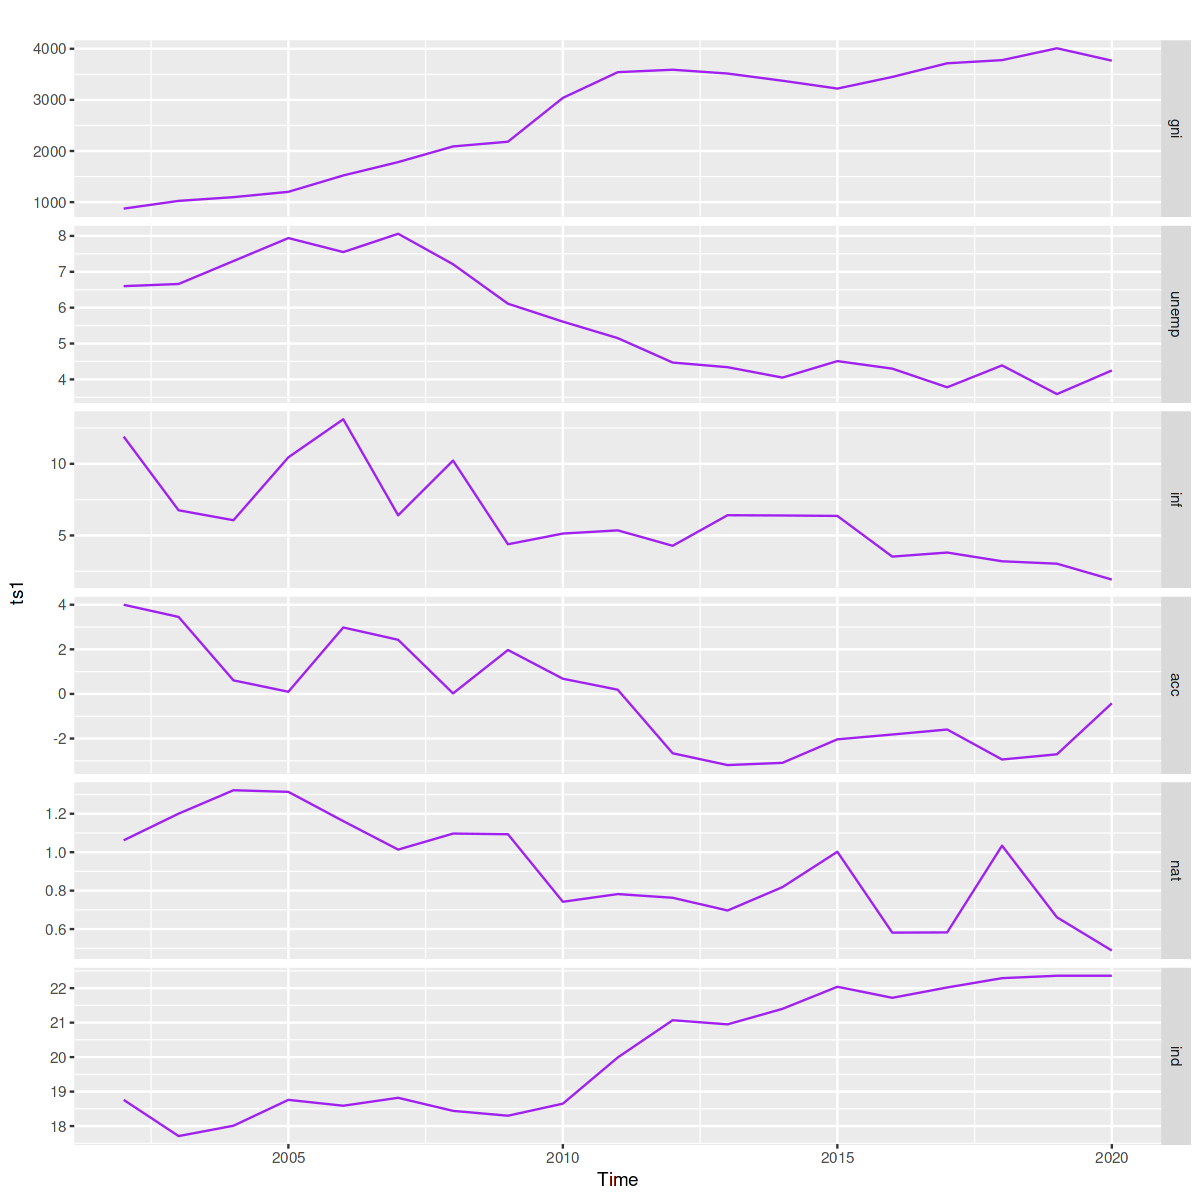

In [4]:
# time series plot, all variables and chosen ones
options(repr.plot.width=10, repr.plot.height=10)

ts0 = ts(df0[-1], start=2002)
autoplot(ts0, facet=T, color="purple",)

ts1 = ts(df1[-1], start=2002)
autoplot(ts1, facet=T, color="purple")

options(op)

### Baseline: (Drifted) Naive Model.

In [5]:
# gni time series data
tsgni = ts1[,"gni"]

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,160.7738,297.2736,228.6904,7.340425,9.284078,1,0.2681736


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-8.84231e-14,250.0468,187.5993,0.2008327,6.71358,0.8203202,0.2681736


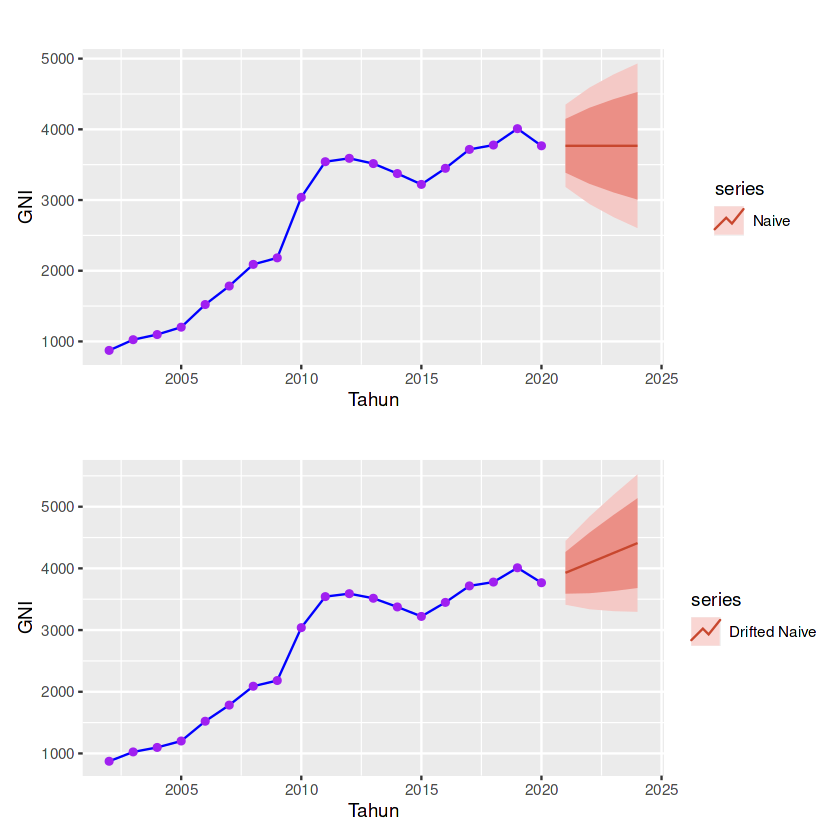

In [6]:
# naive and drifted naive model
p0 = autoplot(tsgni, col="blue", lty=1, ylab="GNI", xlab="Tahun")+
geom_point(col="purple")

p1 = p0+autolayer(naive(tsgni, 4), series="Naive")

p2 = p0+autolayer(rwf(tsgni, 4, drift=T), series="Drifted Naive")

p1/p2

# baseline model. 
accuracy(naive(tsgni, 4))
accuracy(rwf(tsgni, 4, drift=T))

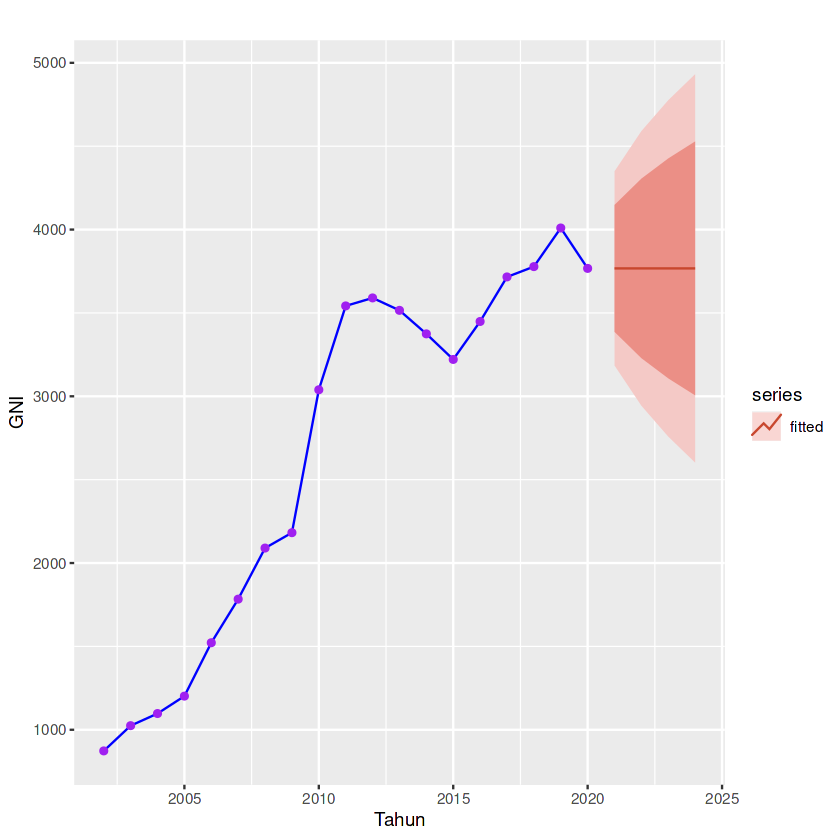

In [7]:
p0+autolayer(rwf(tsgni, h=4), series="fitted")

### VAR
1. for trend and none.
1. using fuel only
2. using Agr
3. using all but none 4 

In [8]:
var0a = VAR(df1[-1], p=1, type="trend")
round(summary(var0a)$varresult$gni$coef,3)

var0a = VAR(df1[-1][-3], p=1, type="trend")
round(summary(var0a)$varresult$gni$coef, 3)

var0a = VAR(df1[-1][,-c(2,3)], p=1, type="trend")
round(summary(var0a)$varresult$gni$coef, 3)

var0a = VAR(df1[-1][,-c(2,3,6)], p=1, type="trend")
round(summary(var0a)$varresult$gni$coef, 3)

var0t = VAR(df1[-1][,-c(2,3,6,5)], p=1, type="trend")
summary(var0t)

,Estimate,Std. Error,t value,Pr(>|t|)
gni.l1,1.081,0.189,5.732,0.000
unemp.l1,76.191,83.590,0.911,0.382
inf.l1,-20.119,28.416,-0.708,0.494
acc.l1,88.723,46.758,1.898,0.084
nat.l1,427.468,481.671,0.887,0.394
ind.l1,-62.362,42.897,-1.454,0.174
trend,48.800,37.625,1.297,0.221


,Estimate,Std. Error,t value,Pr(>|t|)
gni.l1,1.109,0.181,6.142,0.000
unemp.l1,63.508,79.934,0.795,0.442
acc.l1,93.309,45.335,2.058,0.062
nat.l1,477.477,466.458,1.024,0.326
ind.l1,-74.710,38.369,-1.947,0.075
trend,55.342,35.706,1.550,0.147


,Estimate,Std. Error,t value,Pr(>|t|)
gni.l1,1.125,0.177,6.362,0.000
acc.l1,107.461,41.093,2.615,0.021
nat.l1,690.033,376.655,1.832,0.090
ind.l1,-63.675,35.256,-1.806,0.094
trend,45.638,33.073,1.380,0.191


,Estimate,Std. Error,t value,Pr(>|t|)
gni.l1,0.915,0.144,6.364,0.000
acc.l1,78.010,40.652,1.919,0.076
nat.l1,56.603,148.025,0.382,0.708
trend,33.218,34.866,0.953,0.357



VAR Estimation Results:
Endogenous variables: gni, acc 
Deterministic variables: trend 
Sample size: 18 
Log Likelihood: -151.561 
Roots of the characteristic polynomial:
0.8596 0.8596
Call:
VAR(y = df1[-1][, -c(2, 3, 6, 5)], p = 1, type = "trend")


Estimation results for equation gni: 
gni = gni.l1 + acc.l1 + trend 

       Estimate Std. Error t value Pr(>|t|)    
gni.l1   0.9285     0.1356   6.848 5.53e-06 ***
acc.l1  89.2595    27.2451   3.276   0.0051 ** 
trend   34.7900    33.6227   1.035   0.3172    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 228.4 on 15 degrees of freedom
Multiple R-Squared: 0.995,	Adjusted R-squared: 0.994 
F-statistic:  1001 on 3 and 15 DF,  p-value: < 2.2e-16 


Estimation results for equation acc: 
acc = gni.l1 + acc.l1 + trend 

         Estimate Std. Error t value Pr(>|t|)    
gni.l1 -0.0011447  0.0008303  -1.379 0.188200    
acc.l1  0.6857188  0.1668310   4.110 0.000927 ***
trend   0.2412965  0.2058837 

In [9]:
var0b = VAR(df1[-1], p=1, type="none")
round(summary(var0b)$varresult$gni$coef,3)

var0b = VAR(df1[-1][-c(2)], p=1, type="none")
round(summary(var0b)$varresult$gni$coef,3)

var0b = VAR(df1[-1][-c(2,3)], p=1, type="none")
round(summary(var0b)$varresult$gni$coef,3)

var0b = VAR(df1[-1][-c(2,3,6)], p=1, type="none")
round(summary(var0b)$varresult$gni$coef,3)

var0n = VAR(ts1[1:19,-c(2,3,5,6)], p=1, type="none")
round(summary(var0n)$varresult$gni$coef,3)


,Estimate,Std. Error,t value,Pr(>|t|)
gni.l1,1.195,0.171,6.980,0.000
unemp.l1,46.781,82.711,0.566,0.582
inf.l1,-29.170,28.318,-1.030,0.323
acc.l1,73.922,46.615,1.586,0.139
nat.l1,452.613,494.773,0.915,0.378
ind.l1,-41.730,40.955,-1.019,0.328


,Estimate,Std. Error,t value,Pr(>|t|)
gni.l1,1.198,0.167,7.191,0.000
inf.l1,-24.348,26.288,-0.926,0.371
acc.l1,87.366,39.036,2.238,0.043
nat.l1,619.827,386.214,1.605,0.133
ind.l1,-38.223,39.410,-0.970,0.350


,Estimate,Std. Error,t value,Pr(>|t|)
gni.l1,1.258,0.153,8.232,0.000
acc.l1,84.283,38.696,2.178,0.047
nat.l1,611.266,384.138,1.591,0.134
ind.l1,-53.559,35.581,-1.505,0.154


,Estimate,Std. Error,t value,Pr(>|t|)
gni.l1,1.042,0.055,19.041,0.000
acc.l1,63.937,37.757,1.693,0.111
nat.l1,73.235,146.539,0.500,0.624


,Estimate,Std. Error,t value,Pr(>|t|)
gni.l1,1.067,0.021,51.253,0.000
acc.l1,77.823,24.957,3.118,0.007


In [10]:
# var0b = VAR(df1[-1], p=1, type="b")
# round(summary(var0b)$varresult$gni$coef,3)

# var0b = VAR(df1[-1][-c(6)], p=1, type="b")
# round(summary(var0b)$varresult$gni$coef,3)

# var0b = VAR(df1[-1][-c(2,6)], p=1, type="b")
# round(summary(var0b)$varresult$gni$coef,3)

# var0b = VAR(df1[-1][-c(2,3,6)], p=1, type="b")
# round(summary(var0b)$varresult$gni$coef,3)

# var0c = VAR(df1[-c(2,3,5,6)], p=1, type="b")
# round(summary(var0c)$varresult$gni$coef,3)

# summary(var0c)

In [11]:
# # var for fuel
# varft = VAR(df0[c("gni", "fuel")], p=1, type="trend")
# round(summary(varft)$varresult$gni$coef,3)
# summary(varft)

# varfn = VAR(df0[c("gni", "fuel")], p=1, type="none")
# round(summary(varfn)$varresult$gni$coef,3)
# summary(varfn)

In [12]:
# # var for gdp
# vargt = VAR(df0[c("gni", "gdppc")], p=1, type="trend")
# round(summary(vargt)$varresult$gni$coef,3)
# summary(vargt)

# vargn = VAR(df0[c("gni", "gdppc")], p=1, type="none")
# round(summary(vargn)$varresult$gni$coef,3)
# summary(vargn)

In [13]:
fBest = function(mod, nam){
    kap = cbind(model=nam, broom::glance(mod)[2], BIC=BIC(mod), AIC=AIC(mod))
    return(kap)
}

In [14]:
# varft the best
rbind(fBest(var0t, "var0t"),
      fBest(var0n, "var0n")
      )
# akan digunakan var0n

model,logLik,BIC,AIC
<chr>,<dbl>,<dbl>,<dbl>
var0t,-151.5611,320.4645,315.1223
var0n,-152.8520,317.2655,313.7041


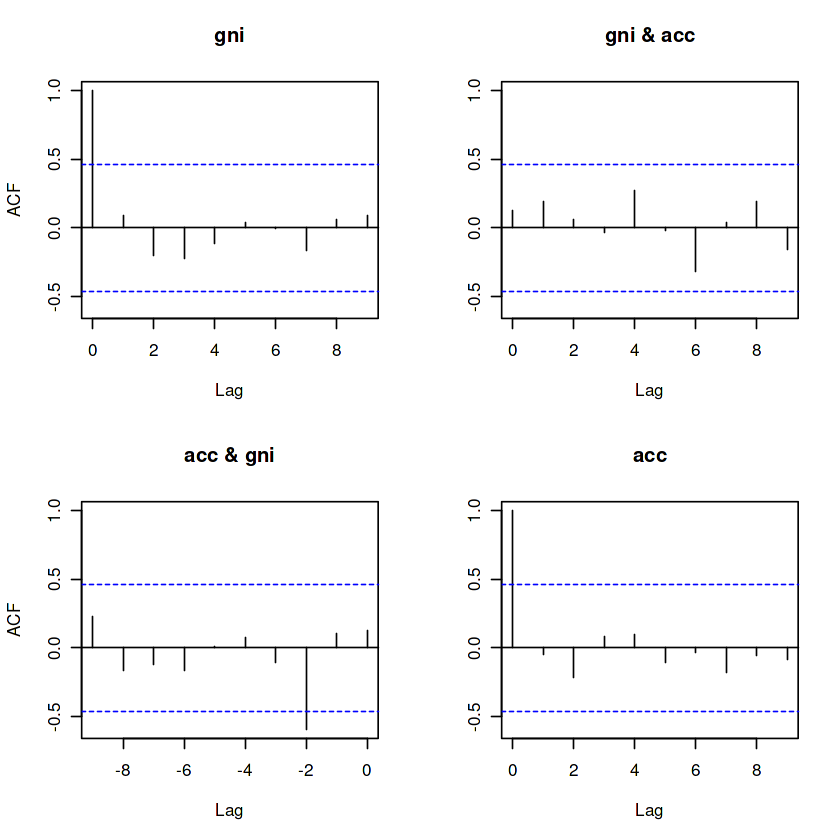

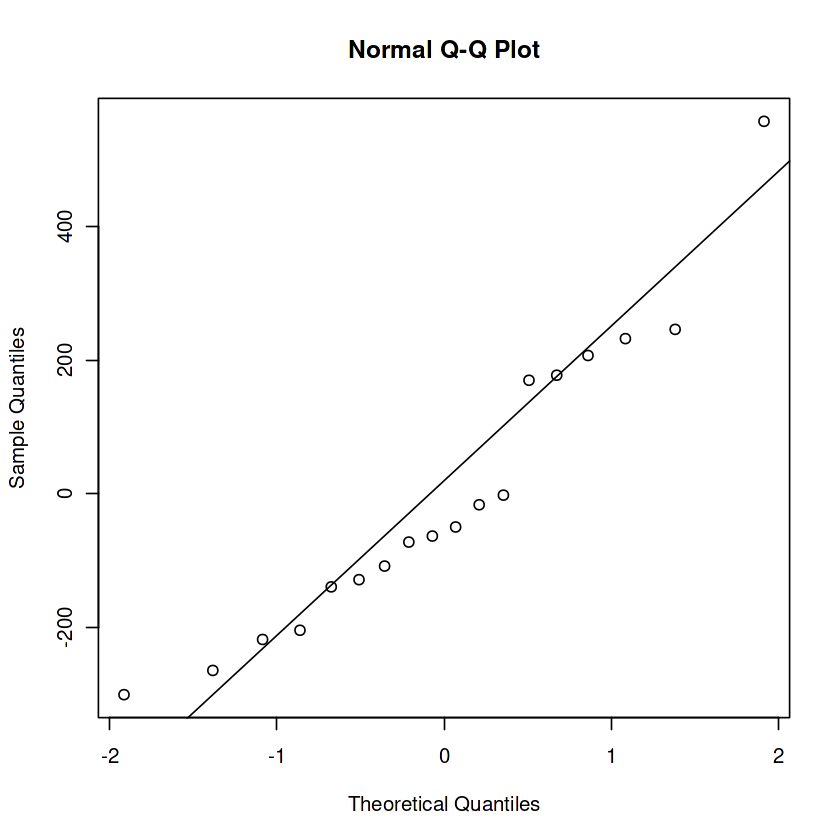

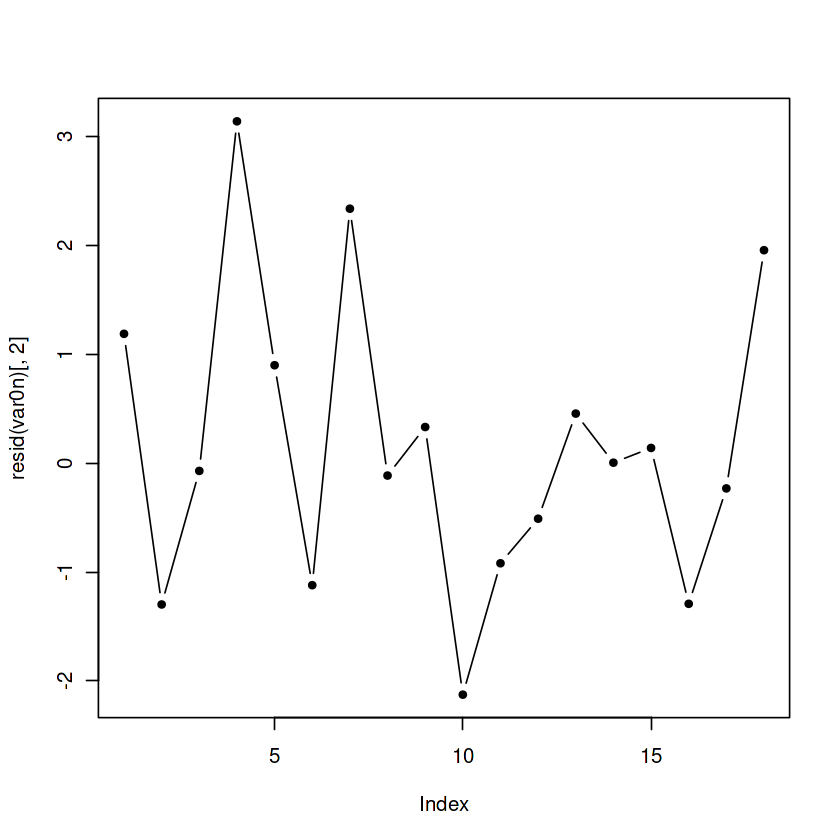

In [15]:
# autocorrelation
acf(resid(var0n))

# normalitas
qqnorm(resid(var0n)[,1])
qqline(resid(var0n)[,1])

# homoskedastistik
plot(resid(var0n)[,2], type="b", pch=20)


In [16]:
accuracy(fitted(var0n, ci = 0.95)[,1], ts1[-1,"gni"])

,ME,RMSE,MAE,MPE,MAPE
Test set,0.9966726,215.7677,175.5367,-1.363369,7.515116


$gni
         fcst    lower    upper        CI
[1,] 3987.532 3538.982 4436.081  448.5498
[2,] 4181.831 3472.462 4891.200  709.3691
[3,] 4361.260 3394.586 5327.935  966.6743
[4,] 4533.040 3313.218 5752.863 1219.8224

$acc
           fcst     lower    upper       CI
[1,] -0.9437529 -3.716147 1.828641 2.772394
[2,] -1.3024649 -4.540376 1.935446 3.237911
[3,] -1.5555667 -4.936237 1.825104 3.380671
[4,] -1.7419036 -5.164632 1.680824 3.422728


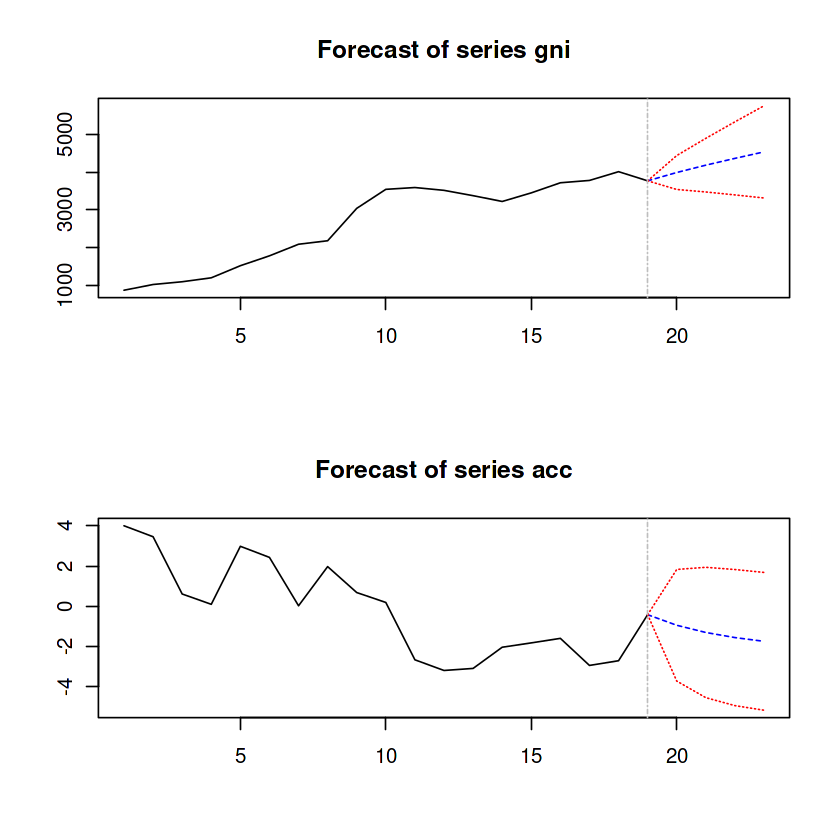

In [17]:
plot(predict(var0n, n.ahead=4, ci=0.95))
predict(var0n, n.ahead=4, ci=0.95)

In [18]:
summary(var0n)


VAR Estimation Results:
Endogenous variables: gni, acc 
Deterministic variables: none 
Sample size: 18 
Log Likelihood: -152.852 
Roots of the characteristic polynomial:
1.034 0.6397
Call:
VAR(y = ts1[1:19, -c(2, 3, 5, 6)], p = 1, type = "none")


Estimation results for equation gni: 
gni = gni.l1 + acc.l1 

       Estimate Std. Error t value Pr(>|t|)    
gni.l1  1.06715    0.02082  51.253  < 2e-16 ***
acc.l1 77.82332   24.95744   3.118  0.00662 ** 
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 228.9 on 16 degrees of freedom
Multiple R-Squared: 0.9947,	Adjusted R-squared: 0.994 
F-statistic:  1494 on 2 and 16 DF,  p-value: < 2.2e-16 


Estimation results for equation acc: 
acc = gni.l1 + acc.l1 

         Estimate Std. Error t value Pr(>|t|)   
gni.l1 -0.0001831  0.0001287  -1.423  0.17397   
acc.l1  0.6063995  0.1542568   3.931  0.00119 **
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 1.41